# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

### 从以上数据可以看出，企鹅种类、所在岛屿以及性别是3个分类变量，嘴峰长度、嘴峰深度、鳍长度以及体重是4个数值变量

### 数据处理前的准备

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
original_data=pd.read_csv("./penguins.csv")
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
clean_data=original_data.copy()
clean_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 一.数据评估与清洗

### 1.处理乱数据

In [4]:
clean_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### 由前面几行数据可以看出，该数据集不存在结构上的错误

### 2.处理脏数据

### （1）缺失数据

In [5]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### 由信息可以看出，嘴峰长度、嘴峰深度、鳍长度、体重以及性别均存在缺失值，各个数据的数据类型并没有差错

In [6]:
clean_data[clean_data["culmen_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


### 嘴峰长度缺失的这两条数据其他数据同样缺失，可以直接删除

In [7]:
clean_data[clean_data["culmen_depth_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
clean_data[clean_data["flipper_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
clean_data[clean_data["body_mass_g"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


### 从中可以看出，嘴峰长度、深度、鳍长度、体重这四个变量是同时缺失的，直接将这两个数据删除即可

In [10]:
clean_data=clean_data.dropna(subset=["body_mass_g"])

In [11]:
clean_data[clean_data["flipper_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


### 接下来再观察性别缺失的变量

In [12]:
clean_data[clean_data["sex"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


### 通过观察数据可以发现，9、246、286、324的体重明显更大，可以猜测性别为雄性，一种解决方法是手动填入性别，另一种方法是可以直接删除这部分数据，因为这部分数据较少，对于数据的分析的影响也较小

In [13]:
clean_data=clean_data.dropna(subset=["sex"])

In [14]:
clean_data[clean_data["sex"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


### （2）重复数据

### 对于每一个变量来说都可以允许重复，因此不必处理重复数据

### （3）不一致数据

### 字符串变量只有物种、所在岛屿以及性别，可以依次检查是否存在不一致的情况

In [15]:
clean_data["species"].value_counts().sort_index()

species
Adelie       146
Chinstrap     68
Gentoo       120
Name: count, dtype: int64

In [16]:
clean_data["island"].value_counts().sort_index()

island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

In [17]:
clean_data["sex"].value_counts().sort_index()

sex
.           1
FEMALE    165
MALE      168
Name: count, dtype: int64

### 发现有一项数据的性别为“.”，为无效数据

In [18]:
clean_data=clean_data.query('sex!="."')

In [19]:
clean_data["sex"].value_counts().sort_index()

sex
FEMALE    165
MALE      168
Name: count, dtype: int64

### （4）无效数据

In [20]:
clean_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


### 观察发现四个数值数据中并没有脱离现实的数据

## 二.数据可视化

In [21]:
# 设置色盘
sns.set_palette("pastel")

### 1.分类变量：种类、所在岛屿、性别

### 对于这三个分类变量，我们可以先一个一个分析，再分析两两之间的关系，逐个分析时可以绘制频率分布直方图或者计数图，也可以绘制饼图

### （1）种类

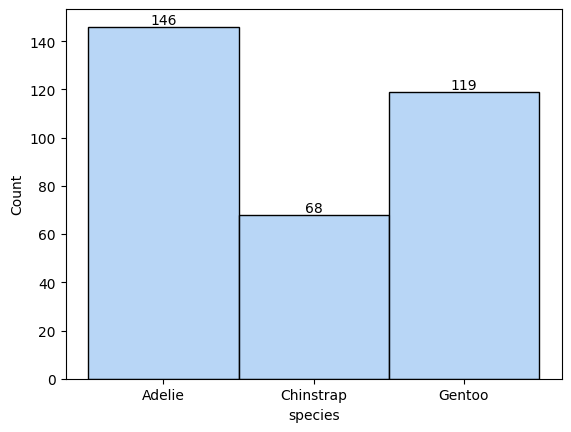

In [40]:
ax3=sns.histplot(clean_data["species"])
# 遍历条柱，手动加标签
for p in ax3.patches:
    # 获取条柱高度（即数量）
    height = p.get_height()  
    # 在条柱中间上方加标签，ha/va 控制对齐
    ax3.text(
        p.get_x() + p.get_width() / 2,  # 水平居中
        height,  # 垂直位置在条柱顶端
        f'{height:.0f}',  # 显示数值，保留 0 位小数
        ha='center', 
        va='bottom'
    )

In [23]:
species_counts=clean_data["species"].value_counts()
species_counts

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x25afeda7230>,
 [Text(0.21141766821205873, 1.0794918107923634, 'Adelie'),
  Text(-0.8153728450579809, -0.7383543346808862, 'Gentoo'),
  Text(0.8813018233018312, -0.6582606598034462, 'Chinstrap')],
 [Text(0.11531872811566837, 0.5888137149776528, '43.8%'),
  Text(-0.4447488245770804, -0.40273872800775606, '35.7%'),
  Text(0.4807100854373624, -0.3590512689836979, '20.4%')])

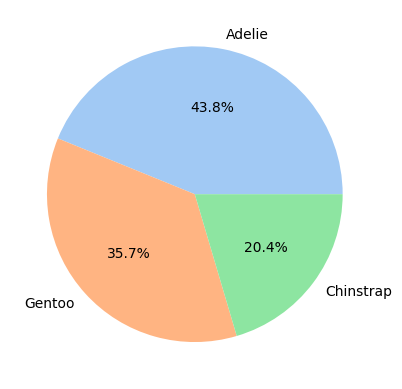

In [24]:
plt.pie(species_counts,labels=species_counts.index,autopct="%.1f%%")

### 由上图可以直观看出，Adelie种类的企鹅最多，占到快一半，Gentoo种类的企鹅次之，Chinstrap种类的企鹅最少

### （2）所在岛屿

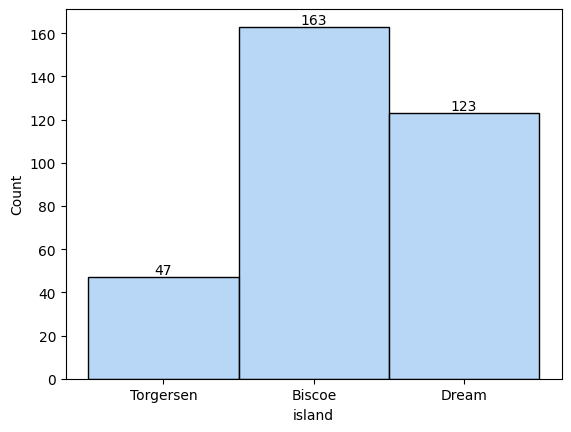

In [41]:
ax4=sns.histplot(clean_data["island"])
# 遍历条柱，手动加标签
for p in ax4.patches:
    # 获取条柱高度（即数量）
    height = p.get_height()  
    # 在条柱中间上方加标签，ha/va 控制对齐
    ax4.text(
        p.get_x() + p.get_width() / 2,  # 水平居中
        height,  # 垂直位置在条柱顶端
        f'{height:.0f}',  # 显示数值，保留 0 位小数
        ha='center', 
        va='bottom'
    )

In [26]:
island_counts=clean_data["island"].value_counts()
island_counts

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x25aff06d590>,
 [Text(0.036315111222426345, 1.0994003878009608, 'Biscoe'),
  Text(-0.5044682329378414, -0.9775028398713591, 'Dream'),
  Text(0.9936243679250859, -0.4719222557429072, 'Torgersen')],
 [Text(0.019808242484959823, 0.599672938800524, '48.9%'),
  Text(-0.275164490693368, -0.5331833672025594, '36.9%'),
  Text(0.5419769279591377, -0.2574121394961312, '14.1%')])

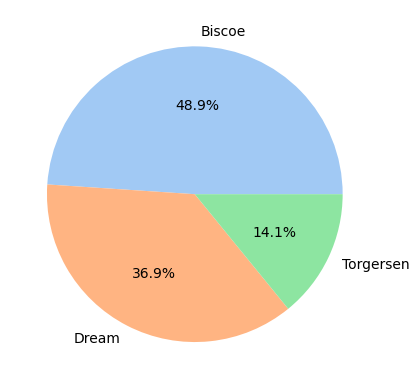

In [27]:
plt.pie(island_counts,labels=island_counts.index,autopct="%.1f%%")

### 由上图可以看出，Biscoe岛屿上的企鹅数量最多，有近一半的企鹅在Biscoe岛屿上，Dream岛屿次之，Torgersen岛屿上的企鹅最少

### （3）性别

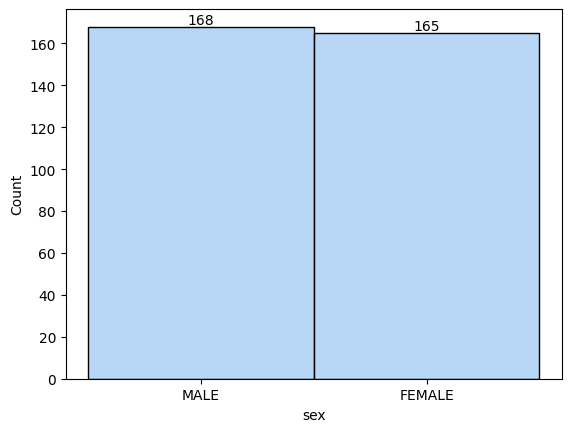

In [43]:
ax5=sns.histplot(clean_data["sex"])
# 遍历条柱，手动加标签
for p in ax5.patches:
    # 获取条柱高度（即数量）
    height = p.get_height()  
    # 在条柱中间上方加标签，ha/va 控制对齐
    ax5.text(
        p.get_x() + p.get_width() / 2,  # 水平居中
        height,  # 垂直位置在条柱顶端
        f'{height:.0f}',  # 显示数值，保留 0 位小数
        ha='center', 
        va='bottom'
    )

In [29]:
sex_counts=clean_data["sex"].value_counts()
sex_counts

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x25afeec9950>,
 [Text(-0.01556599676421093, 1.0998898580061263, 'MALE'),
  Text(0.015565699568373776, -1.0998898622120976, 'FEMALE')],
 [Text(-0.008490543689569597, 0.5999399225487961, '50.5%'),
  Text(0.008490381582749331, -0.5999399248429623, '49.5%')])

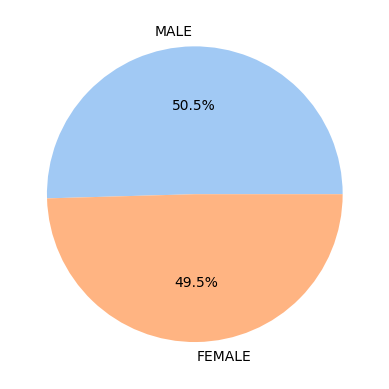

In [30]:
plt.pie(sex_counts,labels=sex_counts.index,autopct="%.1f%%")

### 由上图可以看出，雄性企鹅和雌性企鹅的数量几乎相等

### （4）种类与所在岛屿

### 为了直观反映出种类与所在岛屿的关系，可以使用复式直方图

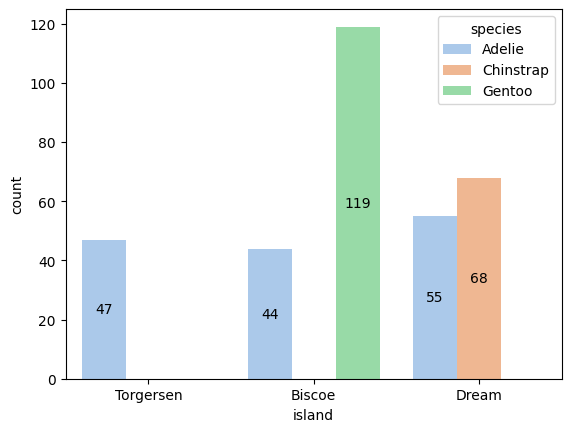

In [31]:
ax1=sns.countplot(data=clean_data,x="island",hue="species")
# 自动为每个条形添加标签，label_type='center' 表示标签在条形中间（也可用 'edge' 等）
for container in ax1.containers:  
    ax1.bar_label(container, label_type='center')  

### 由上图可以直观的看出,Adelie种类的企鹅在三个岛屿上都有分布，且三个岛屿上的数量相近；Gentoo种类的企鹅只分布在Biscoe上，Chinstrap种类的企鹅只分布在Dream岛屿上

### 同样可以使用热力图，只不过需要先把species、island和数量组装成一个二维矩阵，使用透视表

In [32]:
TempDf=pd.DataFrame({"Adelie":[47,44,55],"Gentoo":[0,119,0],"Chinstrap":[0,0,68]},index=["Torgersen","Biscoe","Dream"])
TempDf

,Adelie,Gentoo,Chinstrap
Torgersen,47,0,0
Biscoe,44,119,0
Dream,55,0,68


<Axes: >

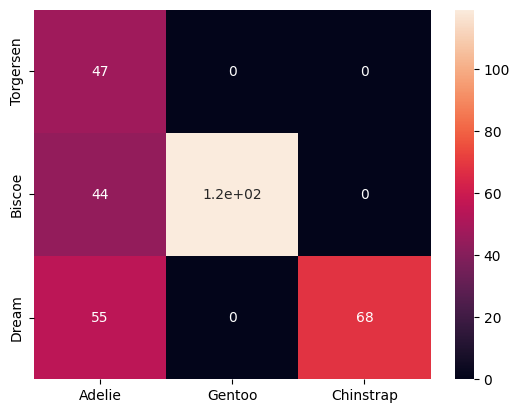

In [33]:
sns.heatmap(TempDf,annot=True)

### （5）种类与性别

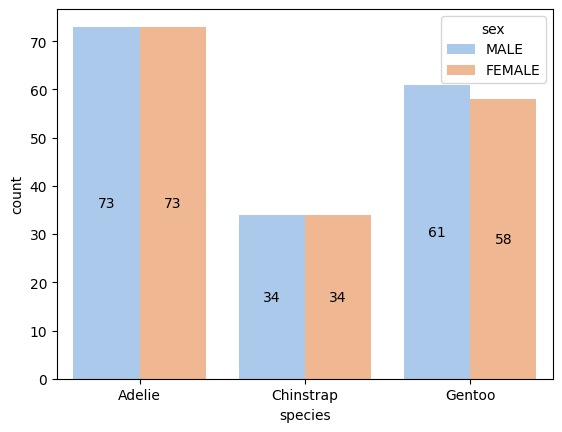

In [34]:
ax2=sns.countplot(data=clean_data,x="species",hue="sex")
# 自动为每个条形添加标签，label_type='center' 表示标签在条形中间（也可用 'edge' 等）
for container in ax2.containers:  
    ax2.bar_label(container, label_type='center')  

### 由此可见，三种种类的企鹅的雌雄比例均接近1：1

### （6）岛屿与性别

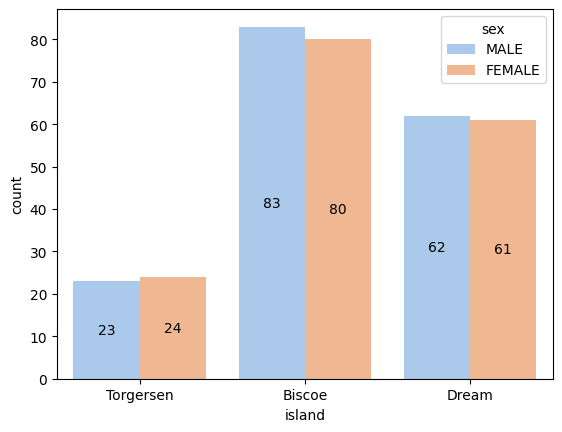

In [35]:
ax3=sns.countplot(data=clean_data,x="island",hue="sex")
# 自动为每个条形添加标签，label_type='center' 表示标签在条形中间（也可用 'edge' 等）
for container in ax3.containers:  
    ax3.bar_label(container, label_type='center')  

### 由此可见，各岛屿上企鹅的雌雄比例也是接近1：1的

### 2.数值变量：嘴峰长度、嘴峰深度、鳍长度、体重

### 对于这四个数值变量，我们可以直接绘制配对图

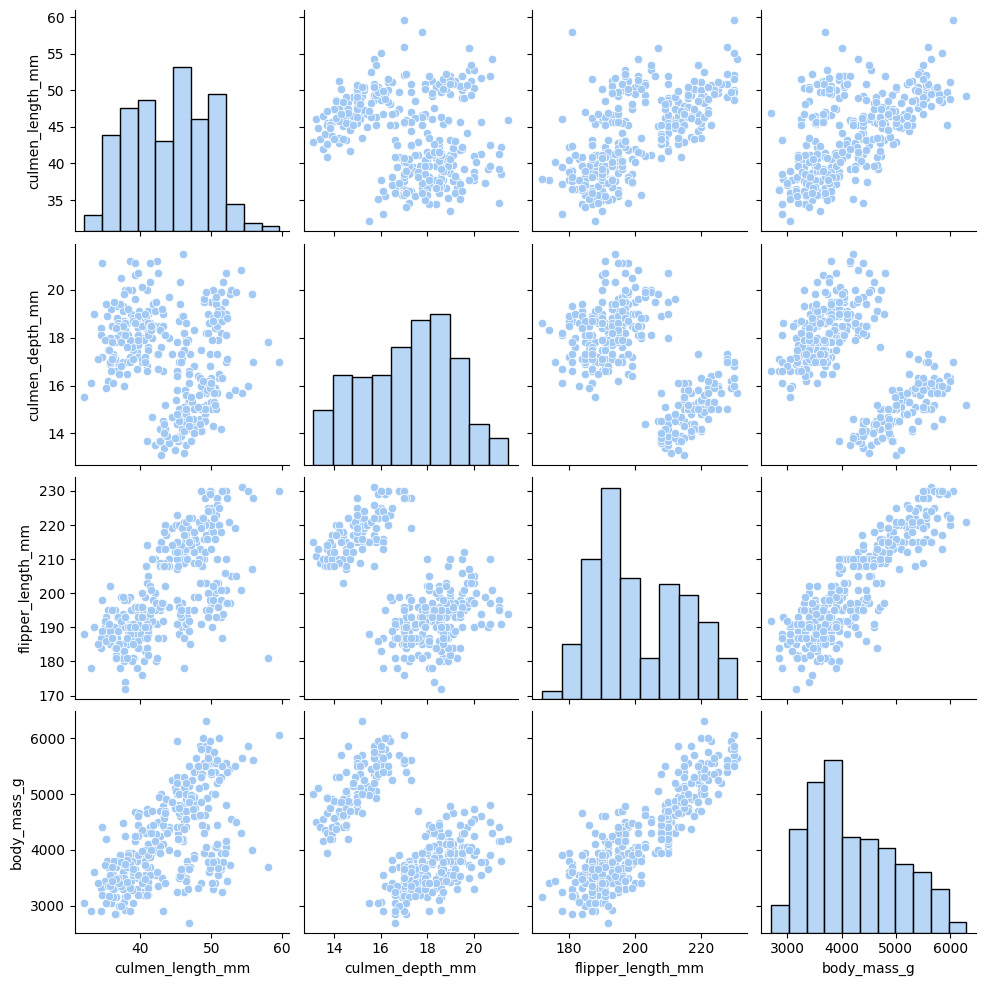

In [36]:
sns.pairplot(clean_data)

### 观察上图可以发现，有些图里面点集群明显分为两簇，猜想可能是因为分类变量不同造成的，因此可以加入分类变量

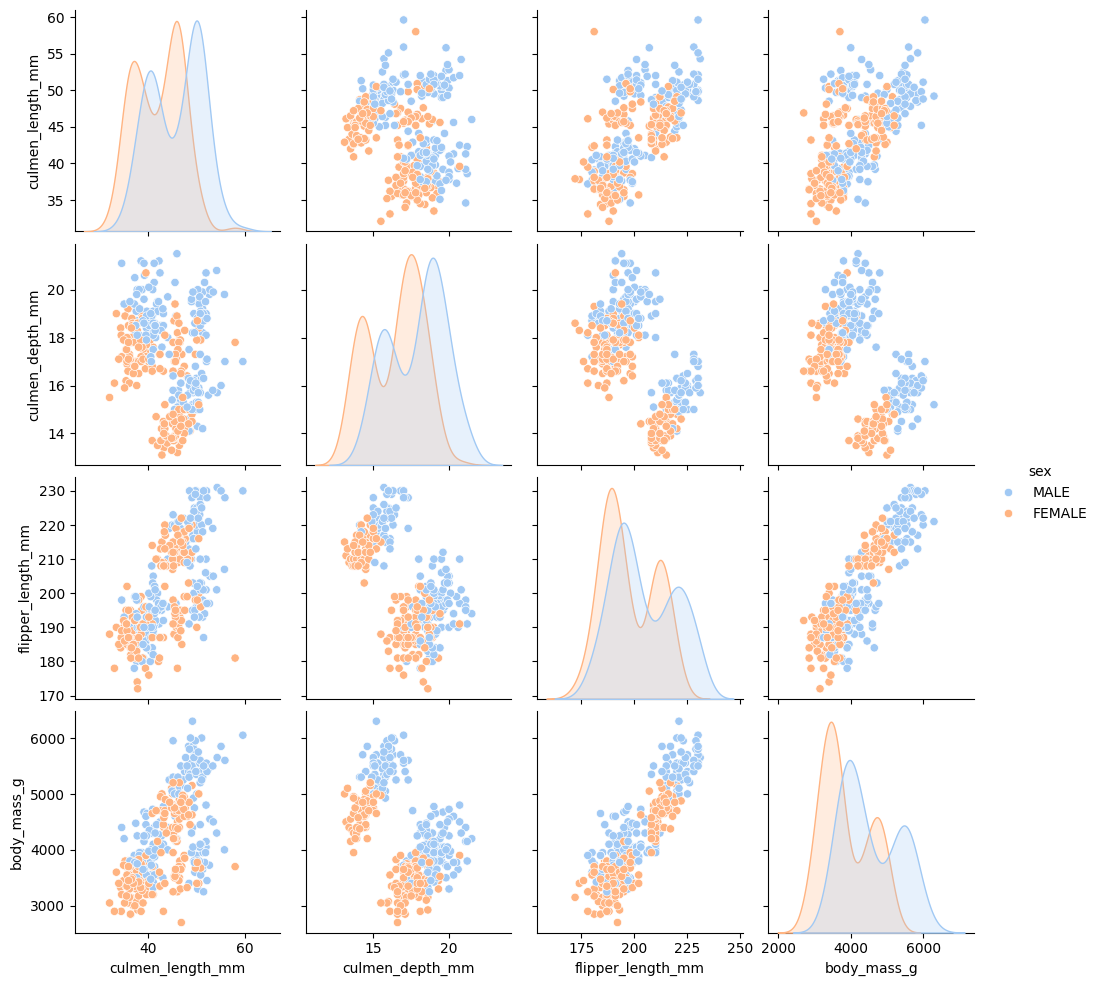

In [37]:
sns.pairplot(clean_data,hue="sex")

### 从上图中可以看出，嘴峰长度与嘴峰深度、嘴峰深度与鳍长度、嘴峰深度与体重 之间大致呈负相关；嘴峰长度与鳍长度、嘴峰长度与体重、鳍长度与体重之间大致呈正相关。
### 并且当其中一个变量一定时，雄性企鹅的另一个变量一般高于雌性企鹅

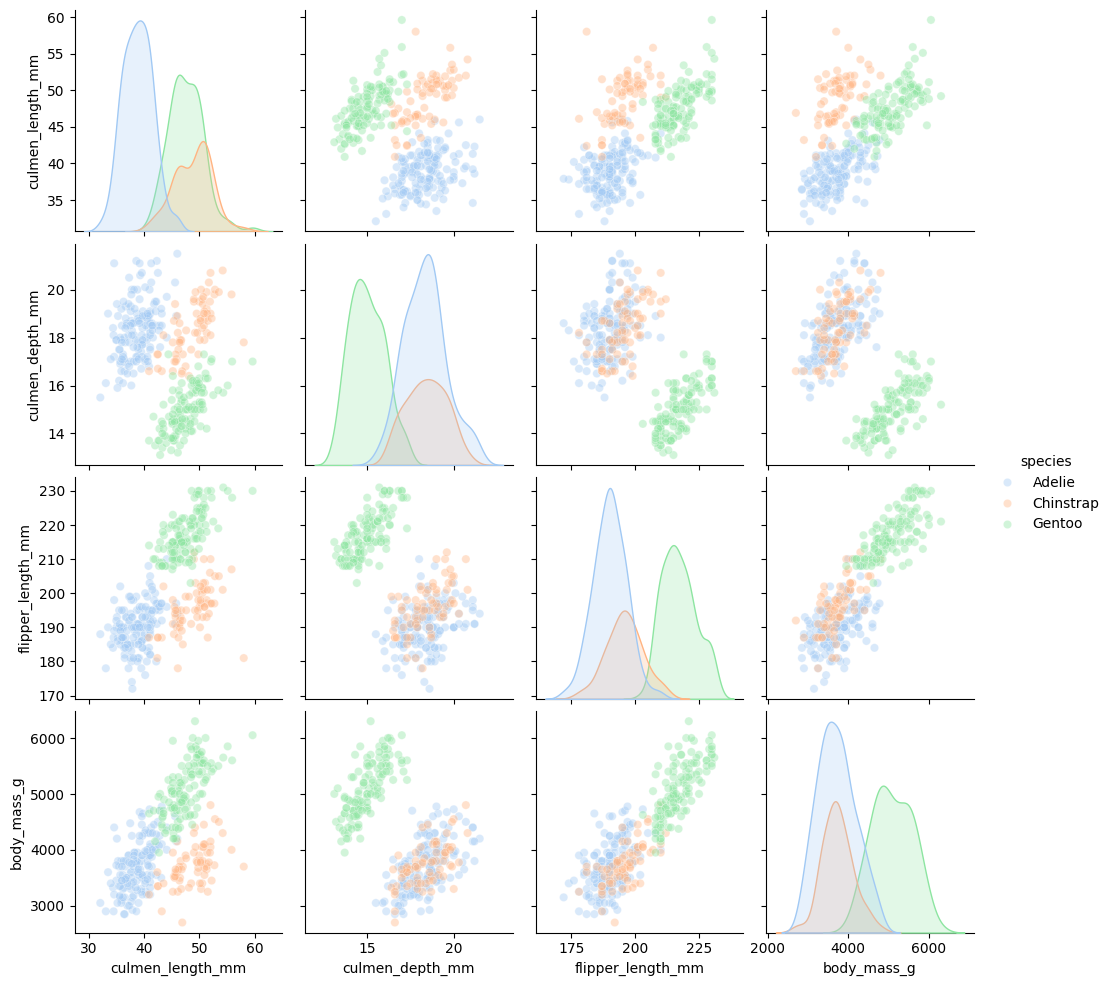

In [38]:
sns.pairplot(clean_data,hue="species",plot_kws={"alpha":0.4})

### 从图中可以看出，Adelie和Chinstrap这两个种类的企鹅的各个数据的中位数比较接近，嘴峰深度与鳍长度、嘴峰深度与体重、鳍长度与体重 之间的变化趋势相近

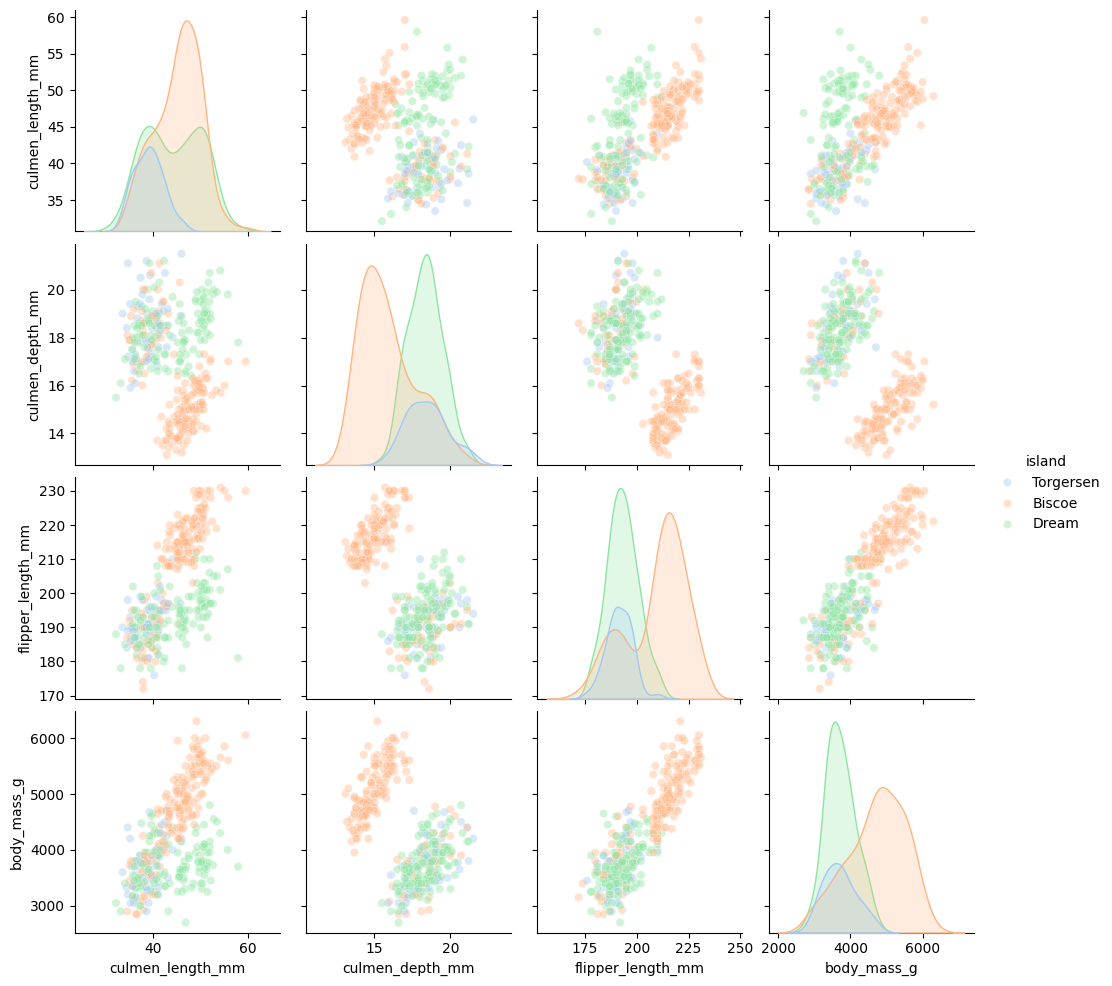

In [39]:
sns.pairplot(clean_data,hue="island",plot_kws={"alpha":0.4})

### 由图中可以看出，Torgersen和Dream两个岛屿上的企鹅各数据均比较接近